<a href="https://colab.research.google.com/github/9C0c0/H-C-M-Y-X-L-NH/blob/main/LAb3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chọn phương pháp biến đổi ảnh:
I - Image Inverse
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching
Nhập lựa chọn (I/G/L/H/C): i


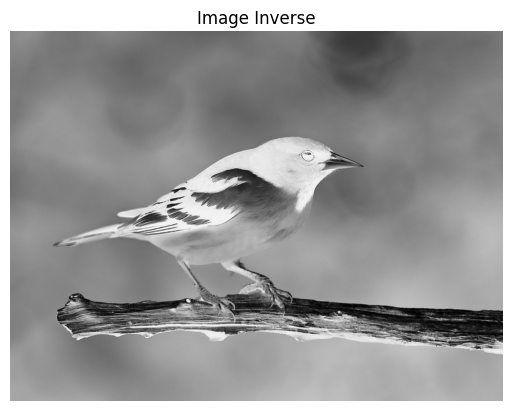

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Hàm hiển thị ảnh
def show_image(title, img_array):
    plt.imshow(img_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Image Inverse Transformation
def inverse_image(img_array):
    return 255 - img_array

# 2. Gamma Correction
def gamma_correction(img_array, gamma=0.5):
    norm_img = img_array.astype(float) / 255.0
    corrected = np.power(norm_img, gamma)
    return np.uint8(corrected * 255)

# 3. Log Transformation
def log_transform(img_array):
    c = 255 / np.log(1 + np.max(img_array))
    log_img = c * np.log(1 + img_array.astype(float))
    return np.uint8(log_img)

# 4. Histogram Equalization
def histogram_equalization(img_array):
    hist, bins = np.histogram(img_array.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_masked = np.ma.masked_equal(cdf, 0)
    cdf_masked = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    cdf = np.ma.filled(cdf_masked, 0).astype('uint8')
    return cdf[img_array]

# 5. Contrast Stretching
def contrast_stretch(img_array):
    a = np.min(img_array)
    b = np.max(img_array)
    stretched = 255 * (img_array.astype(float) - a) / (b - a)
    return np.uint8(stretched)

# ----- Main chương trình -----
# Load ảnh gốc
img = Image.open('bird.png').convert('L')
img_array = np.asarray(img)

# Hiển thị menu
print("Chọn phương pháp biến đổi ảnh:")
print("I - Image Inverse")
print("G - Gamma Correction")
print("L - Log Transformation")
print("H - Histogram Equalization")
print("C - Contrast Stretching")

choice = input("Nhập lựa chọn (I/G/L/H/C): ").strip().upper()

if choice == 'I':
    result = inverse_image(img_array)
    show_image("Image Inverse", result)

elif choice == 'G':
    gamma = float(input("Nhập giá trị gamma (VD: 0.5): "))
    result = gamma_correction(img_array, gamma)
    show_image(f"Gamma Correction (γ={gamma})", result)

elif choice == 'L':
    result = log_transform(img_array)
    show_image("Log Transformation", result)

elif choice == 'H':
    result = histogram_equalization(img_array)
    show_image("Histogram Equalization", result)

elif choice == 'C':
    result = contrast_stretch(img_array)
    show_image("Contrast Stretching", result)

else:
    print("Lựa chọn không hợp lệ!")


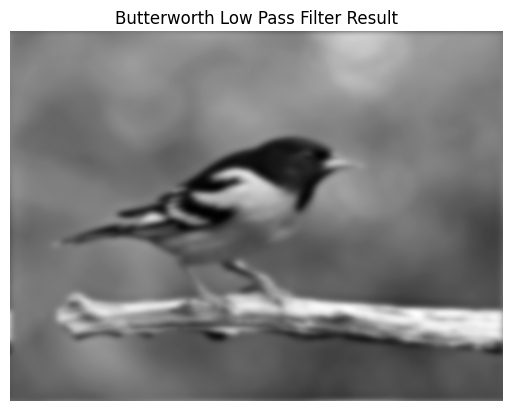

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack


img = Image.open('bird.png').convert('L')
img_array = np.asarray(img)
F = np.fft.fft2(img_array)
F_shifted = np.fft.fftshift(F)
M, N = img_array.shape
center1, center2 = M // 2, N // 2
D0 = 30.0
n = 2
H = np.zeros((M, N), dtype=float)
for i in range(M):
    for j in range(N):
        D = np.sqrt((i - center1)**2 + (j - center2)**2)
        if D == 0:
            H[i, j] = 1
        else:
            H[i, j] = 1 / (1 + (D / D0)**(2 * n))
G = F_shifted * H
G_ishift = np.fft.ifftshift(G)
img_filtered = np.fft.ifft2(G_ishift)
img_filtered = np.abs(img_filtered)
img_result = Image.fromarray(img_filtered.astype(np.uint8))
img.show()
img_result.show()

plt.imshow(img_result, cmap='gray')
plt.title("Butterworth Low Pass Filter Result")
plt.axis('off')
plt.show()


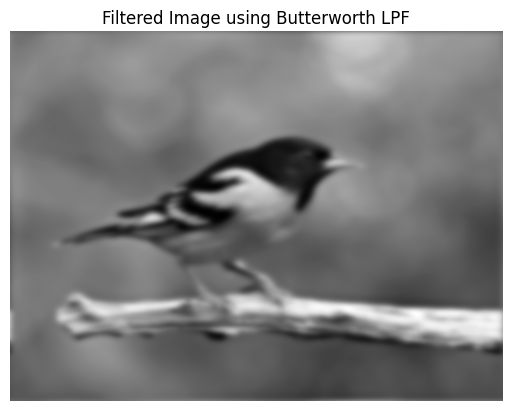

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

img = Image.open('bird.png').convert('L')
img_array = np.asarray(img)
F = np.fft.fft2(img_array)
F_shifted = np.fft.fftshift(F)
rows, cols = img_array.shape
crow, ccol = rows // 2 , cols // 2
D0 = 30.0
n = 2

H = np.zeros((rows, cols), dtype=float)

for u in range(rows):
    for v in range(cols):
        D_uv = np.sqrt((u - crow)**2 + (v - ccol)**2)
        H[u, v] = 1 / (1 + (D_uv / D0)**(2 * n))
G = F_shifted * H
G_ishift = np.fft.ifftshift(G)
img_filtered = np.fft.ifft2(G_ishift)
img_filtered = np.abs(img_filtered)
img_filtered_uint8 = img_filtered.astype(np.uint8)
filtered_img = Image.fromarray(img_filtered_uint8)
img.show()
filtered_img.show()

plt.imshow(filtered_img, cmap='gray')
plt.title("Filtered Image using Butterworth LPF")
plt.axis('off')
plt.show()


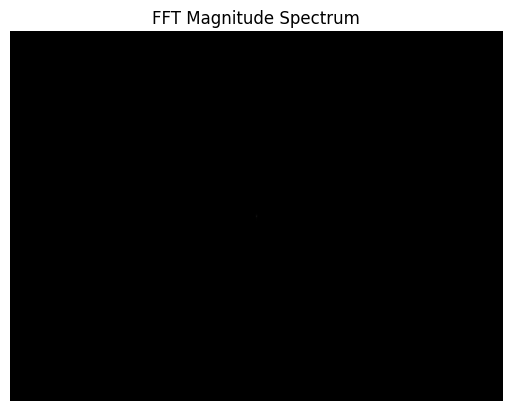

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

img = Image.open('bird.png').convert('L')
img_array = np.asarray(img)
fft_result = np.fft.fft2(img_array)
magnitude = np.abs(fft_result)
shifted_magnitude = np.fft.fftshift(magnitude)
shifted_float = shifted_magnitude.astype(float)
normalized = 255 * (shifted_float / np.max(shifted_float))
fft_image = Image.fromarray(normalized.astype(np.uint8))
img.show()
fft_image.show()

plt.imshow(fft_image, cmap='gray')
plt.axis('off')
plt.title('FFT Magnitude Spectrum')
plt.show()


Min and Max pixel values: 0 255


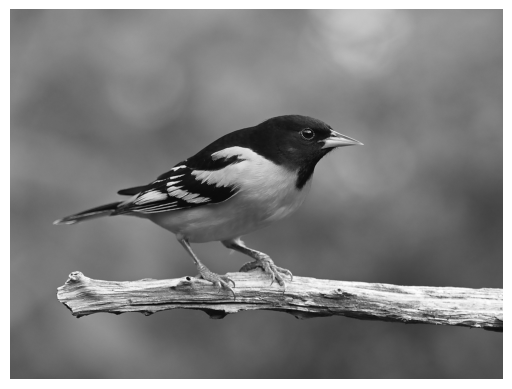

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img = Image.open('bird.png').convert('L')
img_array = np.asarray(img)
max_val = img_array.max()
min_val = img_array.min()
print("Min and Max pixel values:", min_val, max_val)
img_float = img_array.astype(float)
stretched = 255 * (img_float - min_val) / (max_val - min_val)
stretched_img_array = stretched.astype(np.uint8)
stretched_img = Image.fromarray(stretched_img_array)
img.show()
stretched_img.show()
plt.imshow(stretched_img, cmap='gray')
plt.axis('off')
plt.show()


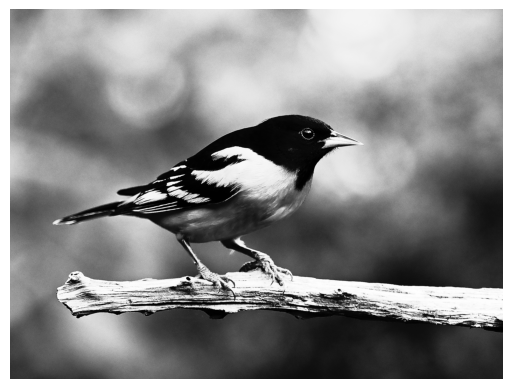

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
flat = im1.flatten()
hist, bins = np.histogram(flat, bins=256, range=[0, 255])
cdf = hist.cumsum()
cdf_masked = np.ma.masked_equal(cdf, 0)
cdf_min = cdf_masked.min()
cdf_max = cdf_masked.max()
cdf_scaled = (cdf_masked - cdf_min) * 255 / (cdf_max - cdf_min)
cdf_final = np.ma.filled(cdf_scaled, 0).astype('uint8')
equalized_flat = cdf_final[flat]
equalized_img_array = equalized_flat.reshape(im1.shape)
equalized_img = Image.fromarray(equalized_img_array)
img.show()
equalized_img.show()

plt.imshow(equalized_img, cmap='gray')
plt.axis('off')
plt.show()


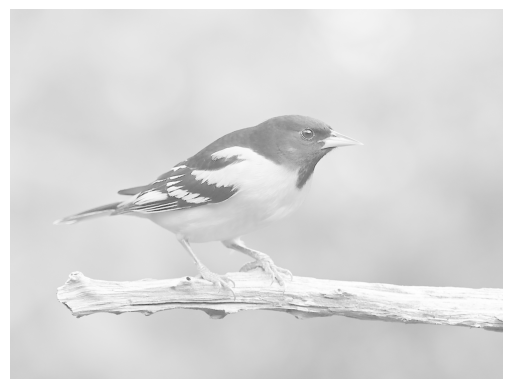

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('bird.png').convert('L')
img_array = np.asarray(img)
img_float = img_array.astype(float)
max_val = np.max(img_float)
log_transformed = (128.0 * np.log(1 + img_float)) / np.log(1 + max_val)
log_image = log_transformed.astype(np.uint8)
output_img = Image.fromarray(log_image)
img.show()
output_img.show()
plt.imshow(output_img, cmap='gray')
plt.axis('off')
plt.show()


<ipython-input-5-62855a7e6565>:9: RuntimeWarning: divide by zero encountered in log
  log_transformed = np.log(normalized) * gamma


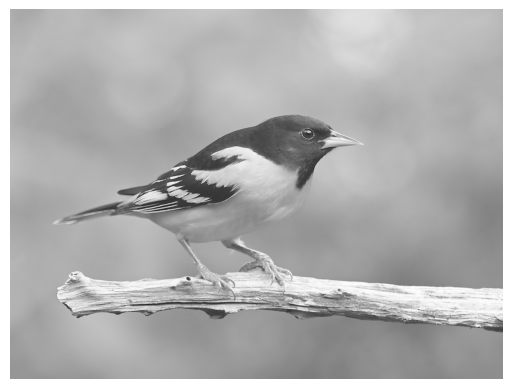

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img = Image.open('bird.png').convert('L')
img_array = np.asarray(img)
gamma = 0.5
img_float = img_array.astype(float)
normalized = img_float / np.max(img_float)
log_transformed = np.log(normalized) * gamma
corrected = np.exp(log_transformed) * 255.0
corrected_img = corrected.astype(np.uint8)
final_img = Image.fromarray(corrected_img)
img.show()
final_img.show()

plt.imshow(final_img, cmap='gray')
plt.axis('off')
plt.show()


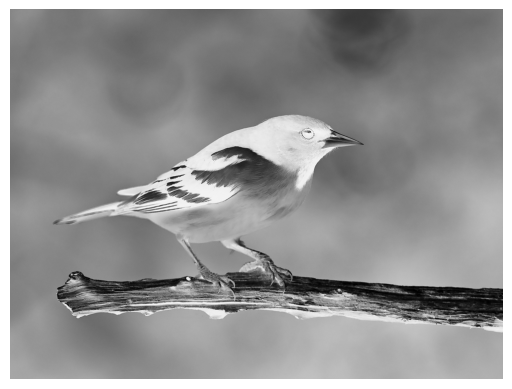

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img = Image.open('bird.png').convert('L')
img_array = np.asarray(img)
inverted_array = 255 - img_array
inverted_img = Image.fromarray(inverted_array)
img.show()
inverted_img.show()
plt.imshow(inverted_img, cmap='gray')
plt.axis('off')
plt.show()


In [3]:
from google.colab import files
uploaded = files.upload()


Saving bird.png to bird.png


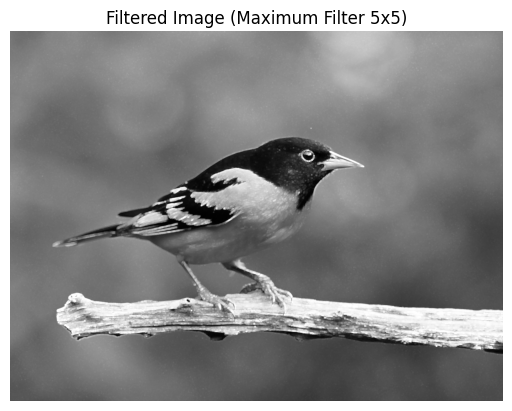

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
image = iio.imread('bird.png', mode="L").astype(np.uint8)

# Áp dụng bộ lọc cực đại (maximum filter) với kích thước cửa sổ 5x5
filtered_image = ndimage.maximum_filter(image, size=5, mode='reflect')

# Lưu ảnh kết quả
iio.imsave('bird_max_filter.png', filtered_image)

# Hiển thị ảnh
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image (Maximum Filter 5x5)")
plt.axis('off')
plt.show()


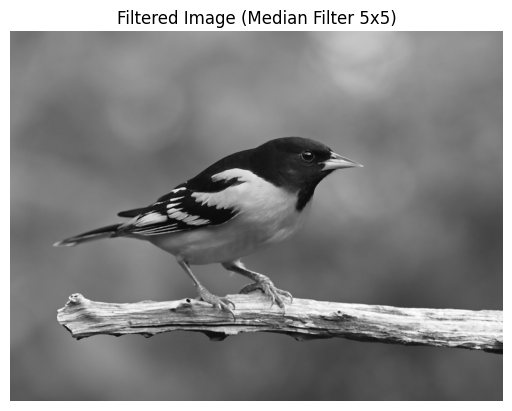

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám (grayscale)
image = iio.imread('bird.png', mode="L").astype(np.uint8)

# Áp dụng bộ lọc trung vị (median filter) với kích thước cửa sổ là 5x5
filtered_image = ndimage.median_filter(image, size=5, mode='reflect')

# Lưu ảnh sau khi lọc
iio.imsave('bird_median_filter.png', filtered_image)

# Hiển thị ảnh
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image (Median Filter 5x5)")
plt.axis('off')
plt.show()


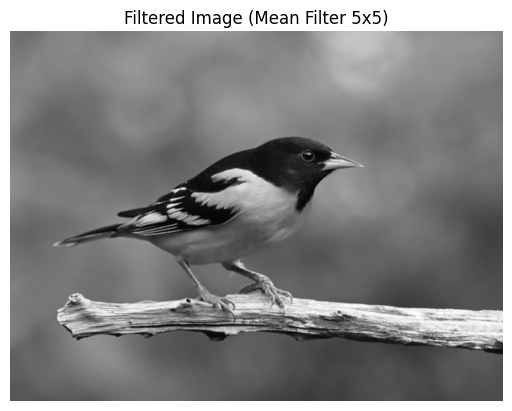

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám (grayscale)
image = iio.imread('bird.png', mode="L")

# Tạo kernel trung bình 5x5 (lọc trung bình)
kernel = np.ones((5, 5), dtype=float) / 25

# Áp dụng bộ lọc trung bình bằng tích chập (convolution)
filtered_image = ndimage.convolve(image, kernel).astype(np.uint8)

# Lưu ảnh sau khi lọc
iio.imsave('bird_mean_filter.png', filtered_image)

# Hiển thị ảnh
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image (Mean Filter 5x5)")
plt.axis('off')
plt.show()



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bird.png to bird.png


In [ ]:
code = '''
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh gốc
img = iio.imread('flower.jpeg')  # Đảm bảo ảnh có cùng thư mục

# Tạo các phiên bản hoán đổi màu
img_BGR = img[:, :, ::-1]            # Hoán đổi RGB -> BGR
img_GRB = img[:, :, [1, 0, 2]]       # Hoán đổi RGB -> GRB
img_BRG = img[:, :, [2, 0, 1]]       # Hoán đổi RGB -> BRG

# Lưu các ảnh
iio.imwrite('flower_BGR.jpeg', img_BGR)
iio.imwrite('flower_GRB.jpeg', img_GRB)
iio.imwrite('flower_BRG.jpeg', img_BRG)

# Hiển thị để kiểm tra
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('BGR')
plt.imshow(img_BGR)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('GRB')
plt.imshow(img_GRB)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('BRG')
plt.imshow(img_BRG)
plt.axis('off')

plt.tight_layout()
plt.show()
'''

# Ghi code vào file .py
with open('hoan_doi_mau.py', 'w') as f:
    f.write(code)


In [ ]:
from google.colab import files
files.download('hoan_doi_mau.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

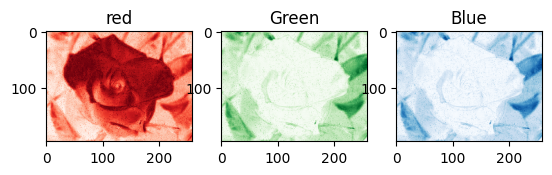

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('flower.jpeg')
plt.subplot(1,3,1)
plt.title('red')
plt.imshow(data[:, :, 0], cmap='Reds')
plt.subplot(1,3,2)
plt.title('Green')
plt.imshow(data[:, :, 1], cmap='Greens')
plt.subplot(1,3,3)
plt.title('Blue')
plt.imshow(data[:, :, 1], cmap='Blues')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flower.jpeg to flower.jpeg


In [ ]:
import imageio.v2 as iio
data = iio.imread('flower.jpeg')


[[119 119 119 ... 132 132 132]
 [119 119 119 ... 132 132 132]
 [119 119 119 ... 132 132 132]
 ...
 [ 89  88  88 ...  81  81  81]
 [ 89  88  88 ...  81  81  81]
 [ 89  88  89 ...  81  81  81]]


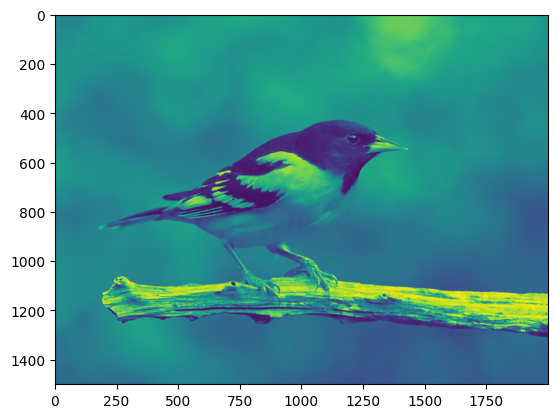

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys
a = iio.imread('bird.png', mode="L").astype(np.uint8)
b = sn.median_filter(a, size=5, footprint=None, output=None,
                     mode='reflect', cval=0.0, origin=0)
iio.imwrite('bird_median_filter1.png', b)
print(b)
plt.imshow(b)
plt.show()

[[119 119 119 ... 132 131 131]
 [119 119 119 ... 131 131 131]
 [120 120 119 ... 132 132 131]
 ...
 [ 89  89  89 ...  80  80  80]
 [ 89  89  89 ...  80  80  80]
 [ 90  89  89 ...  80  80  80]]


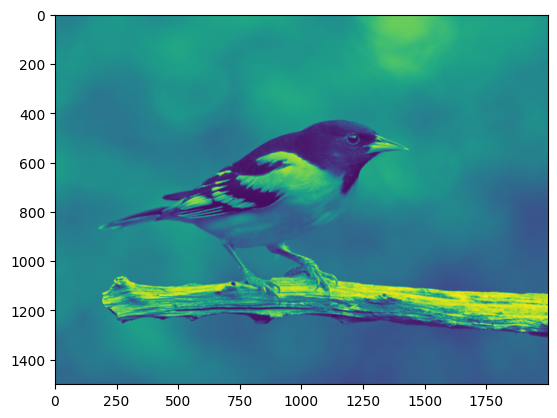

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
import scipy.ndimage as sn
a=iio.imread('bird.png',mode="L")
k=np.ones((5,5))/25
b=sn.convolve(a,k).astype(np.uint8)
iio.imsave=('bird_mean_filter.png',b)
print(b)
plt.imshow(b)
plt.show()

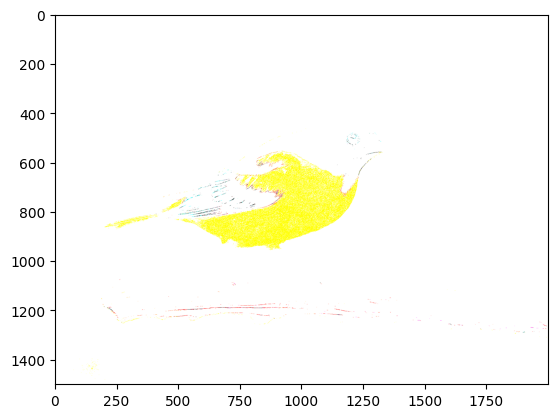

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
rgb=iio.imread('bird.png')
rgb2hsv=np.vectorize(colorsys.rgb_to_hsv)
h,s,v=rgb2hsv(rgb[:,:,0],rgb[:,:,1],rgb[:,:,2])
h*=h
hsv2rgb=np.vectorize(colorsys.hsv_to_rgb)
rgb2=hsv2rgb(h,s,v)
rgb2= np.array(rgb2).transpose((1,2,0))
plt.imshow(rgb2)
plt.show()

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
a= colorsys.rgb_to_hsv(255,0,0)
print(a)
b= colorsys.rgb_to_hsv(1,0,0)
print(b)
c= colorsys.rgb_to_hsv(0,255,0)
print(c)
d= colorsys.rgb_to_hsv(1,1,255)
print(d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 255)
(0.6666666666666666, 0.996078431372549, 255)


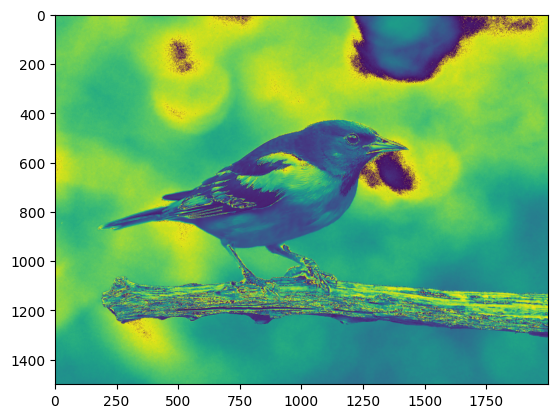

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data=iio.imread('bird.png')
bdata=(data[:,:,1]+data[:,:,2])
plt.imshow(bdata)
plt.show()

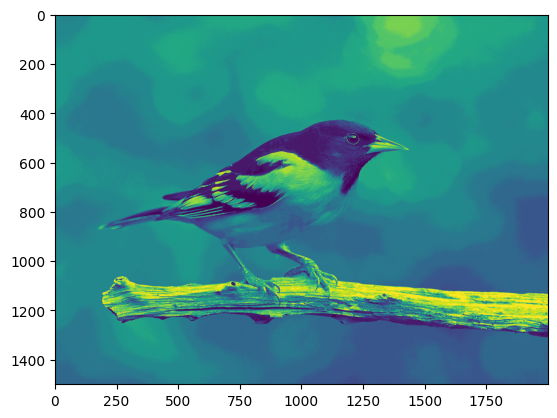

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='L').astype(np.uint8)
cl = data & 0xF0
iio.imsave('birdf0.png',cl)
tmp=iio.imread('birdf0.png')
plt.imshow(tmp)
plt.show()

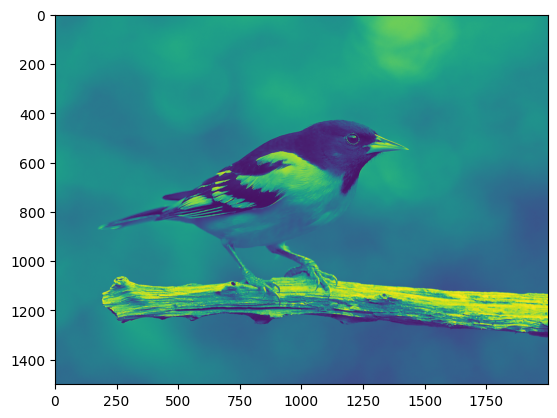

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='F')
plt.imshow(data)
plt.show()

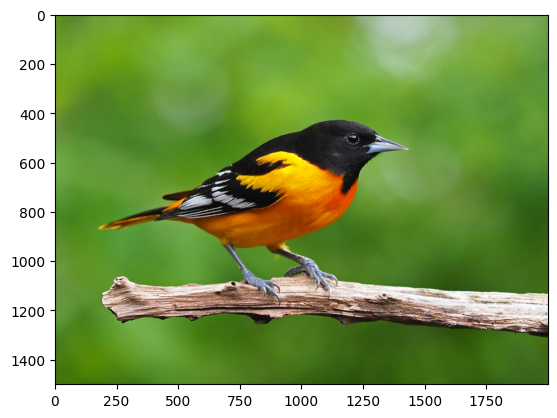

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()

In [ ]:
from  PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()

In [ ]:
!pip install imageio scipy scikit-image
